# <font color=purple> Mandatory Project Python Advanced By Nishita Singh S3593
  We are using a California housing dataset.

Following are the columns present in the table:-
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

Features:-
1.Nominal Features: ocean_proximity (categorical feature indicating the proximity to the ocean).
2.Ordinal Features: None.
3.Discrete Features: total_rooms,total_bedrooms,households.[Discrete data is made up of discrete or distinct values.] 
4.Continuous Features: longitude, latitude, median_income, median_house_value.[Continuous data includes any value that falls inside a range.]

In [1]:
#importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('housing.xlsx')     #Loading the file
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
data.info()        #info() method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
#The dropna method will modify your DataFrame directly,that means that if you set inplace = True,
#dropna will drop all missing values from your original dataset.

data.dropna(inplace=True)
data  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


# <font color=green> Data Visualization

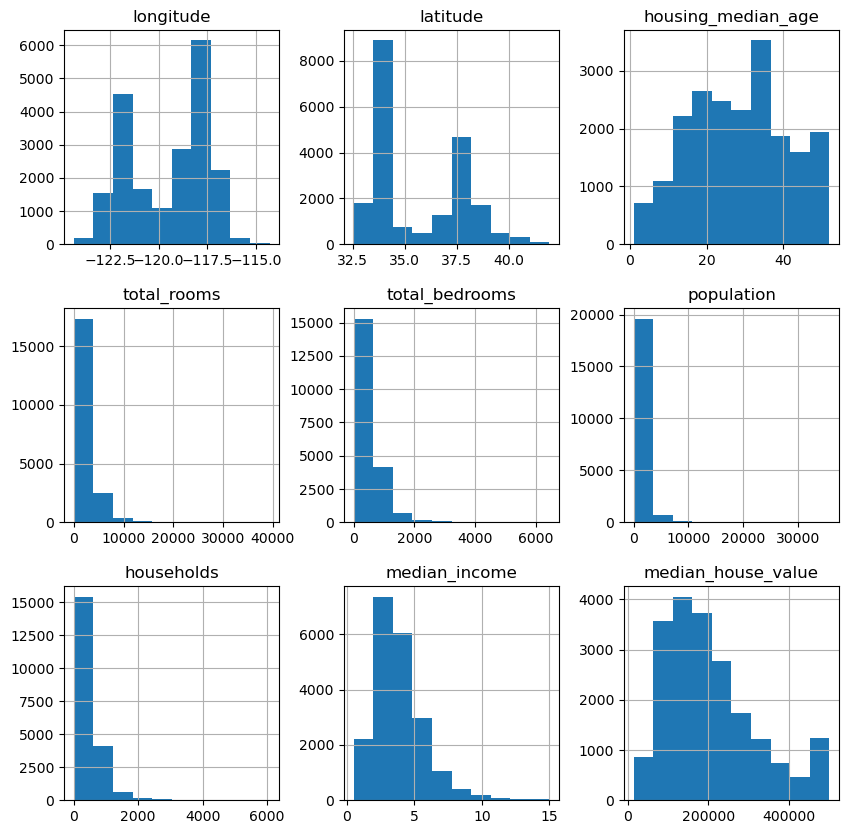

In [5]:
data.hist(figsize=(10,10))  # we use the hist() function to create histograms for each column to visualize the data. 
#figsize: Attribute allows us to specify the width and height of a figure in inches.
plt.show()

Observations:Many Histograms Are Tailed Heavily.(Presence of outliers and the data is not evenly distributed.)

## 1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.


In [7]:
#median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
average_median_income = data['median_income'].mean() #calculated the average median income by taking the mean of the 'median_income' column.
print("Average Median Income:", average_median_income)

Average Median Income: 3.8711616013312273


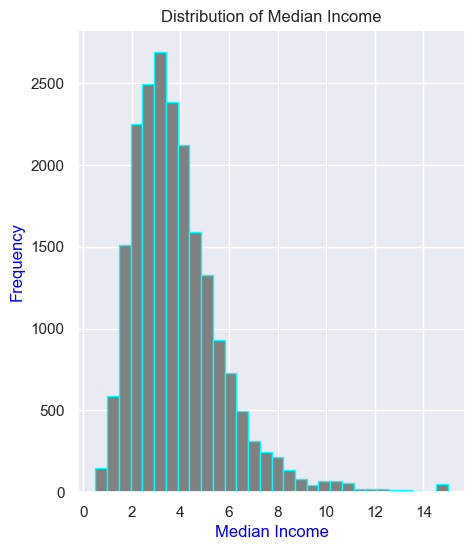

In [67]:
#Plotting the distribution of median_income
plt.figure(figsize=(5, 6)) # Attribute allows us to specify the width and height of a figure in  inches.
plt.hist(data['median_income'],bins=30,edgecolor='aqua',color='grey') # Plot the histogram of 'median_income'
plt.title("Distribution of Median Income") #gives title
plt.xlabel("Median Income",color='blue') #Labels the axis
plt.ylabel("Frequency",color='blue') 
plt.show()   #displays the graph

Observations:Histogram shows the insights of spread of median income values in the dataset. The shape of the histogram can reveal whether the data is skewed or normally distributed.This looks like a slight right skewed data so we can say that the data is positively skewed.It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

## 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

In [47]:
#HousingMedianAge: Median age of a house within a block; a lower number is a newer building.
data.loc[0:10,['housing_median_age']] #Selects 0:10-rows,and column of housing median age using label based selection of data.

,housing_median_age
0,41
1,21
2,52
3,52
4,52
5,52
6,52
7,52
8,42
9,52


In [40]:
data.describe() #Used for calculating some statistical data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


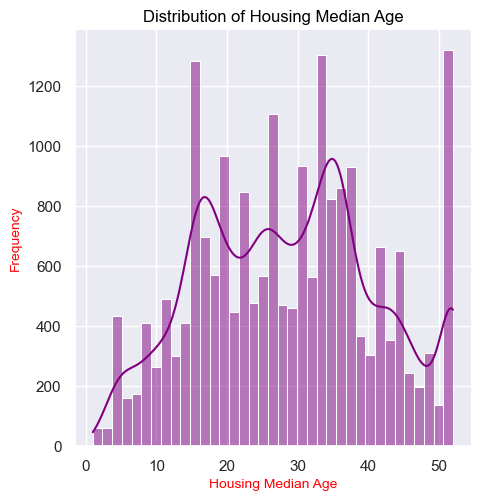

In [61]:
# Plotting histogram to show the distribution of housing_median_age 
sns.displot(x='housing_median_age',data=data,kde=True,color='purple')  #kde=True merges the both plot
#Kde-Kernel density estimate is a method for visualizing the distribution of observations in a dataset.
plt.title("Distribution of Housing Median Age",color='black') 
plt.xlabel("Housing Median Age",color='red',size=10) 
plt.ylabel("Frequency",color='red',size=10) 
plt.show()
plt.show()

Observations:By analyzing the histogram we can say that the houses aged between 31-34 are the highest,there are very less new buildings in the block.Mostly all the houses are aged between 13 to 39 years.

## 3.Show with the help of visualization, how median_income and median_house_values are related?

Using Relplot for plotting the median_income vs median_house_values.
The Seaborn Relational Plot (relplot) allows us to visualise how variables within a dataset relate to each other.

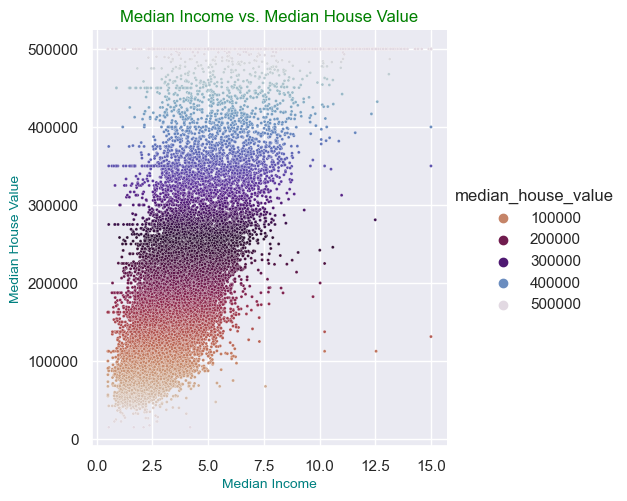

In [57]:
sns.set() # will load seaborn's default theme and color palette to the session.
sns.relplot(data=data,x='median_income',y='median_house_value', 
            kind='scatter',color='olive',s=5,hue='median_house_value',palette='twilight_r')
#'hue' is used to visualize the data of different categories in one plot.
#'palette' is used to change the colour of the plot.
plt.title('Median Income vs. Median House Value',color='green')      
plt.xlabel('Median Income',color='teal',size=10)
plt.ylabel('Median House Value',color='teal',size=10)
plt.show()

In [15]:
data.corr('')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


Observations:By analyzing the scatter plot we can say that there is somewhat a positive correlation between Median income and Median house value. The data points tend to form an upward-sloping pattern from left to right, it indicates a positive correlation. 
It shows that as the 'median_income' increases, the 'median_house_value' tends to increase as well.At the same time we can see several outliers in the data.Outliers may represent unique situations or errors in data collection.

## 4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.



In [9]:
#Creating a new dataset by removing rows with missing total_bedrooms values

data_without_missing_bedrooms = data.dropna(subset=['total_bedrooms'], inplace=False)

#The subset parameter enables you to specify the subset of columns where dropna will look for missing values.
#When inplace=False is used, it performs operation on data and returns a new copy of data.

 We created a new dataset by removing rows where the 'total_bedrooms' value is not available (NaN).

In [10]:
data_without_missing_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


## 5.Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [113]:
# Creating a new dataset by filling missing total_bedrooms with mean value 
mean_total_bedrooms = data['total_bedrooms'].mean()
mean_total_bedrooms

537.8705525375618

In [114]:
#fillna() method replaces the NULL values with a specified value.
newdata_mean_bedrooms = data.fillna({'total_bedrooms': mean_total_bedrooms}) 
newdata_mean_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


We created a new dataset by filling the missing 'total_bedrooms' values with the mean value of 'total_bedrooms' from the original dataset.

## 6.Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [11]:
# User-defined function to calculate the median value 
def calculate_median(data,column): 
    data_list = data[column].tolist() #Converts column to list using Series.tolist()
    sorted_data = sorted(data_list) #sorts the data
    n = len(data_list)              #checks the length of the data
    
    if n % 2 == 0:   #for even data          
        median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2 #Takes the mean of two mid values 
    else: 
        median = sorted_data[n // 2]      #gives the mid value
    return median

The user-defined function calculate_median takes a list of data as input and returns its median value. The function first changes the column into list using ".tolist()" then sorts the data in ascending order and then calculates the median based on whether the number of data points is even or odd. For odd it gives the mid value as median and for even it takes the mean of two mid values.

In [12]:
calculate_median(data,'latitude') #Median of the latitude column using user defined function created above.

34.26

In [13]:
data['latitude'].median() #Median of the latitude column using inbuilt function to verify result of calculate_median function.

34.26

## 7. Plot latitude versus longitude and explain your observations.

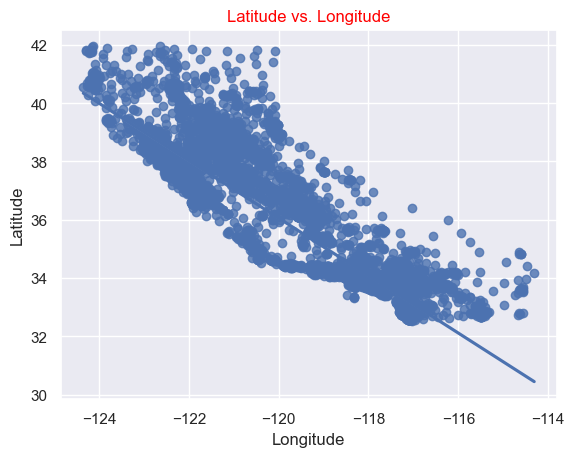

In [20]:
#longitude: A measure of how far west a house is; a higher value is farther west
#latitude: A measure of how far north a house is; a higher value is farther north

#Plotting the latitude vs longitude 

sns.set()
sns.regplot(data=data,x='longitude',y='latitude')
plt.title("Latitude vs. Longitude",color='red') 
plt.xlabel("Longitude") 
plt.ylabel("Latitude") 
plt.show()

Observations:We can see that most of the houses are on the west coast,this is expected as sea front houses are worth more than houses that are not on the coast.

## 8. Create a data set for which the ocean_proximity is ‘Near ocean’.

In [44]:
# OceanProximity: Location of the house w.r.t ocean/sea

#Value_counts() function returns series that will contain counts of unique values present in ocean_proximity.
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [45]:
# finds the unique elements of ocean_proximity.
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [46]:
# Creating a new dataset where ocean_proximity is 'Near ocean' 
data_near_ocean = data[data['ocean_proximity'] == 'NEAR OCEAN']

Created a new dataset containing only those rows where the 'ocean_proximity' column has the value 'Near ocean'.

In [74]:
data_near_ocean.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52                  1820         300.0           806         270         3.0147         94600               NEAR OCEAN         1
-117.26    33.19     2                   2629         509.0           1044        522         4.2361         158500              NEAR OCEAN         1
-117.25    32.72     33                  1677         228.0           629         239         6.5970         496400              NEAR OCEAN         1
                     36                  2632         450.0           2038        419         6.5319         345800              NEAR OCEAN         1
           32.73     37                  2224         331.0           821         341         6.3331         400000              NEAR OCEAN         1
                                                                                                         

## 9: Find the mean and median of the median income for the data set created in question 8.

In [63]:
# Calculate mean and median of median income for the dataset with ocean_proximity as 'Near ocean' 
mean_median_income_near_ocean = data_near_ocean['median_income'].mean()   
median_median_income_near_ocean = data_near_ocean['median_income'].median() 
print("Mean Median Income (Near ocean):", mean_median_income_near_ocean) 
print("Median Median Income (Near ocean):", median_median_income_near_ocean)

Mean Median Income (Near ocean): 4.005784800601957
Median Median Income (Near ocean): 3.64705


Calculated the mean and median of the 'median_income' column for the dataset where 'ocean_proximity' is 'Near ocean'.

## 10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [75]:
#totalBedrooms: Total number of bedrooms within a block
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [86]:
# Created a function that returns the total_bedroom_size based on the given conditions.
def get_bedroom_size(data):

    if data['total_bedrooms']<=10:
        return ('Small')
    elif data['total_bedrooms']>=11 and data['total_bedrooms']<1000:
        return('Medium')
    else:
        return('Large')

In [87]:
# Used 'apply' function to Apply a function along an axis of the Data.
data['total_bedroom_size']= data.apply(get_bedroom_size, axis = 1)   #axis=1 i.e rows

In [91]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,Medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,Large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,Medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,Medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,Medium
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,Medium
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,Medium
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,Medium
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,Medium


We created a new column 'total_bedroom_size' in the dataset based on the provided conditions. The function get_bedroom_size takes the number of bedrooms as input and assigns a size category ('small', 'medium', or 'large') based on the conditions specified in the question. The apply method is used to apply this function to the 'total_bedrooms'column and populate the new 'total_bedroom_size' column.